<a href="https://colab.research.google.com/github/gulugulu2042/EDA/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis** - BCSE331L
# Gokularajan R
22BDS0137

Given dataset : Diabetes


## Importing and viewing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35,0,33.6,0.627,50,1
1,1.0,85,66,29,0,26.6,0.351,31,0
2,8.0,183,64,0,0,23.3,0.672,32,1
3,1.0,89,66,23,94,28.1,0.167,21,0
4,0.0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,767.000000,768.000000,768.000000,768.000000,768.000000,768.000000,767.000000,768.000000
mean,3.850065,120.894531,69.105469,20.536458,79.799479,31.992578,0.471995,33.240885
std,3.368910,31.972618,19.355807,15.952218,115.244002,7.884160,0.331529,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.371000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Checking for Null values and cleaning

In [5]:
df.isnull().sum()

,0
Pregnancies,1
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,1
Age,0
Outcome,0


In [6]:
df.dropna(inplace=True) #Only 2 rows with null values
len(df)

766

In [7]:
list_0 = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
(df[list_0] == 0).sum()

,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


Upon some research in the domain, we see that a 0 in the features :

glucose (Acceptable range : <200),

Blood pressure (only diastolic - Acceptable range : 60-180),

Skin Thickness (in mm),

Insulin (2 hrs after glucose administration - healthy range : 16-166),

BMI


is highly improbable and is possibly incorrect data. We need to clean this before further analysis. We can visualise the 0 outliers using a box plot wwith restricted whisker size


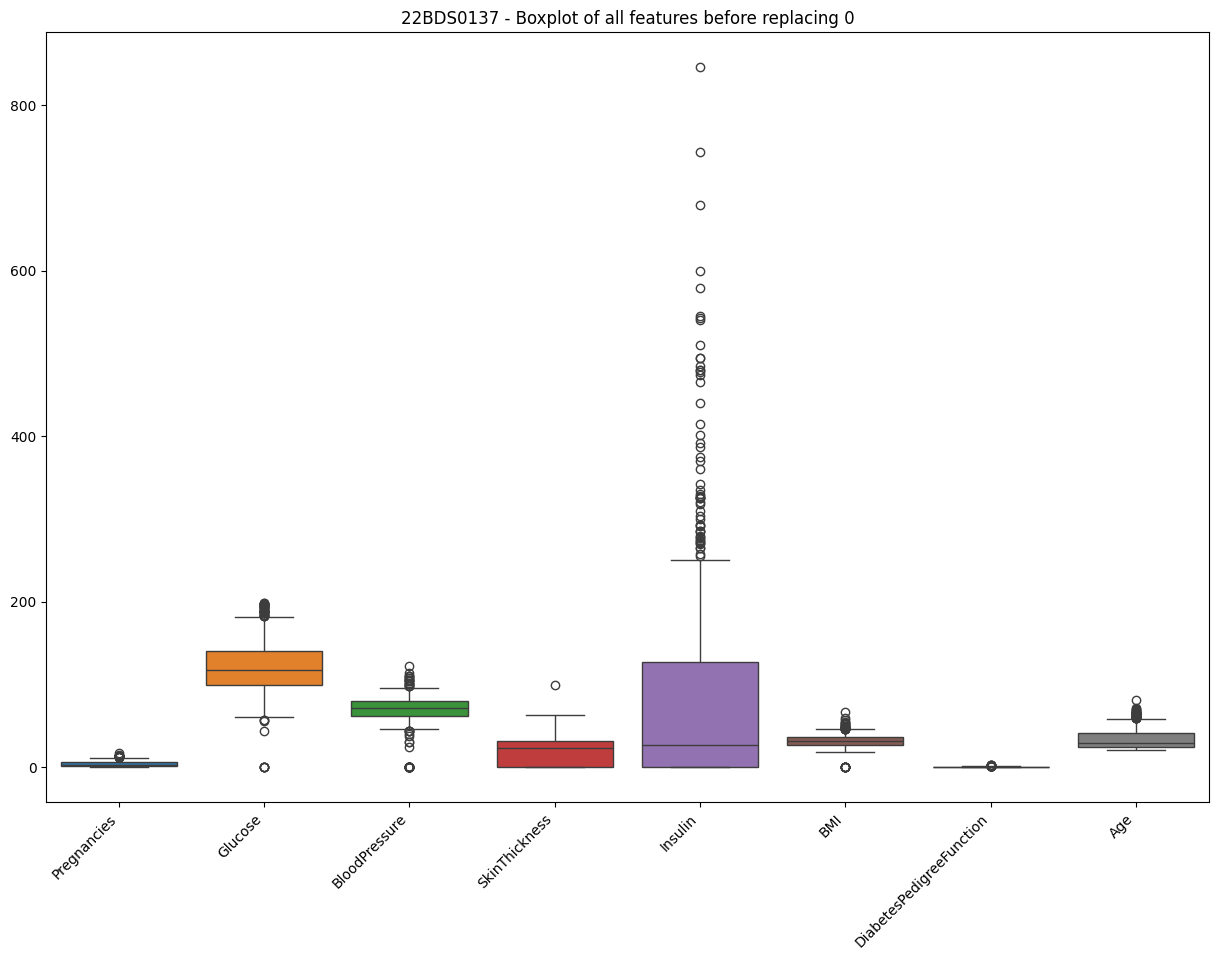

In [8]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, whis=1) # using whiskers restricted to 1*IQR to represent outliers with value 0
# Given dataset has minimal variance and only through limiting whiskers we can visualise 0-outliers
# even then, features like skin thickness have so much 0-outliers that 0 itself is the 25th percentile
plt.xticks(rotation=45, ha='right')
plt.title('22BDS0137 - Boxplot of all features before replacing 0')
plt.show()

In [9]:
means = df[list_0].mean()
df[list_0]=df[list_0].replace(0, means)

#Replaced all 0's with corresponding feature's mean
(df[list_0] == 0).sum()

,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


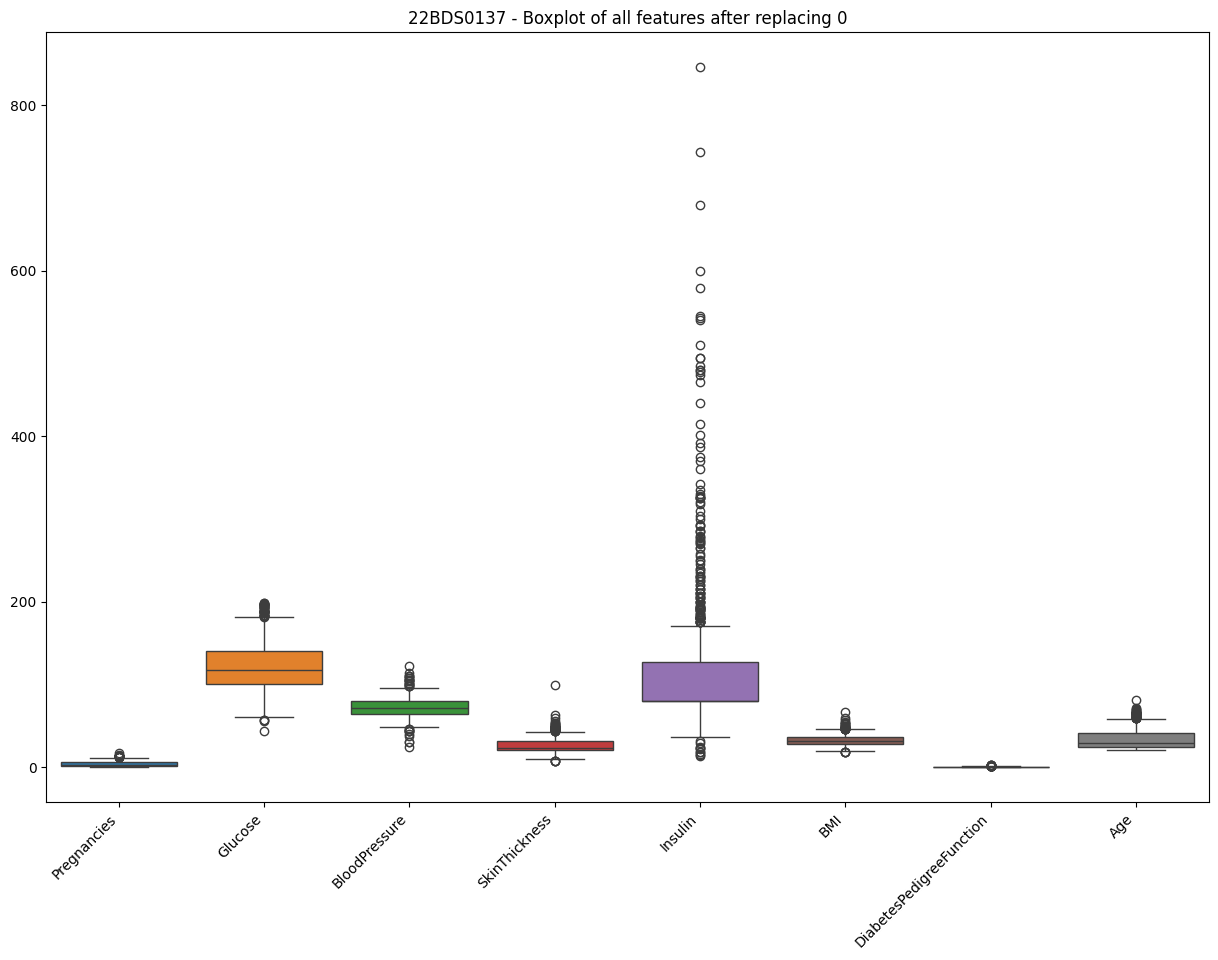

In [10]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, whis=1)
plt.xticks(rotation=45, ha='right')
plt.title('22BDS0137 - Boxplot of all features after replacing 0')
plt.show()

In [11]:
(df == '?').sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,3


In [12]:
# Removing rows where outcome is ?
df = df[df['Outcome'] != '?']


In [38]:
df.dtypes #Outcome is a string of 1/0

,0
Pregnancies,float64
Glucose,float64
BloodPressure,float64
SkinThickness,float64
Insulin,float64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,object


In [39]:
df["Outcome"] = df["Outcome"].astype(int)

## Univariate Analysis


In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.858453,121.817628,72.284455,26.609469,118.637794,32.451838,0.472046,33.285714
std,3.369368,30.467226,12.136878,9.659363,93.327526,6.890489,0.332054,11.782016
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,20.515666,79.613577,27.500000,0.243500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.613577,32.000000,0.370000,29.000000
75%,6.000000,141.000000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<Axes: title={'center': '22BDS0137 - Outcome pie chart'}, ylabel='count'>

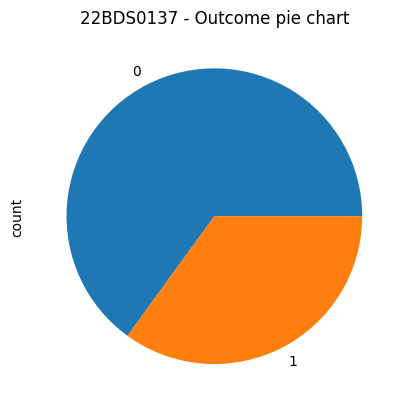

In [13]:
df.Outcome.value_counts().plot(kind = "pie", title="22BDS0137 - Outcome pie chart")

<ipython-input-18-a57f24d06a69>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p3 = sns.distplot(df.BloodPressure, kde=True, ax = axes[1,0])
<ipython-input-18-a57f24d06a69>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p4 = sns.distplot(df.Glucose, kde=True, ax = axes[1,1])
<ipython-input-18-a57f24d06a69>:9: UserWar

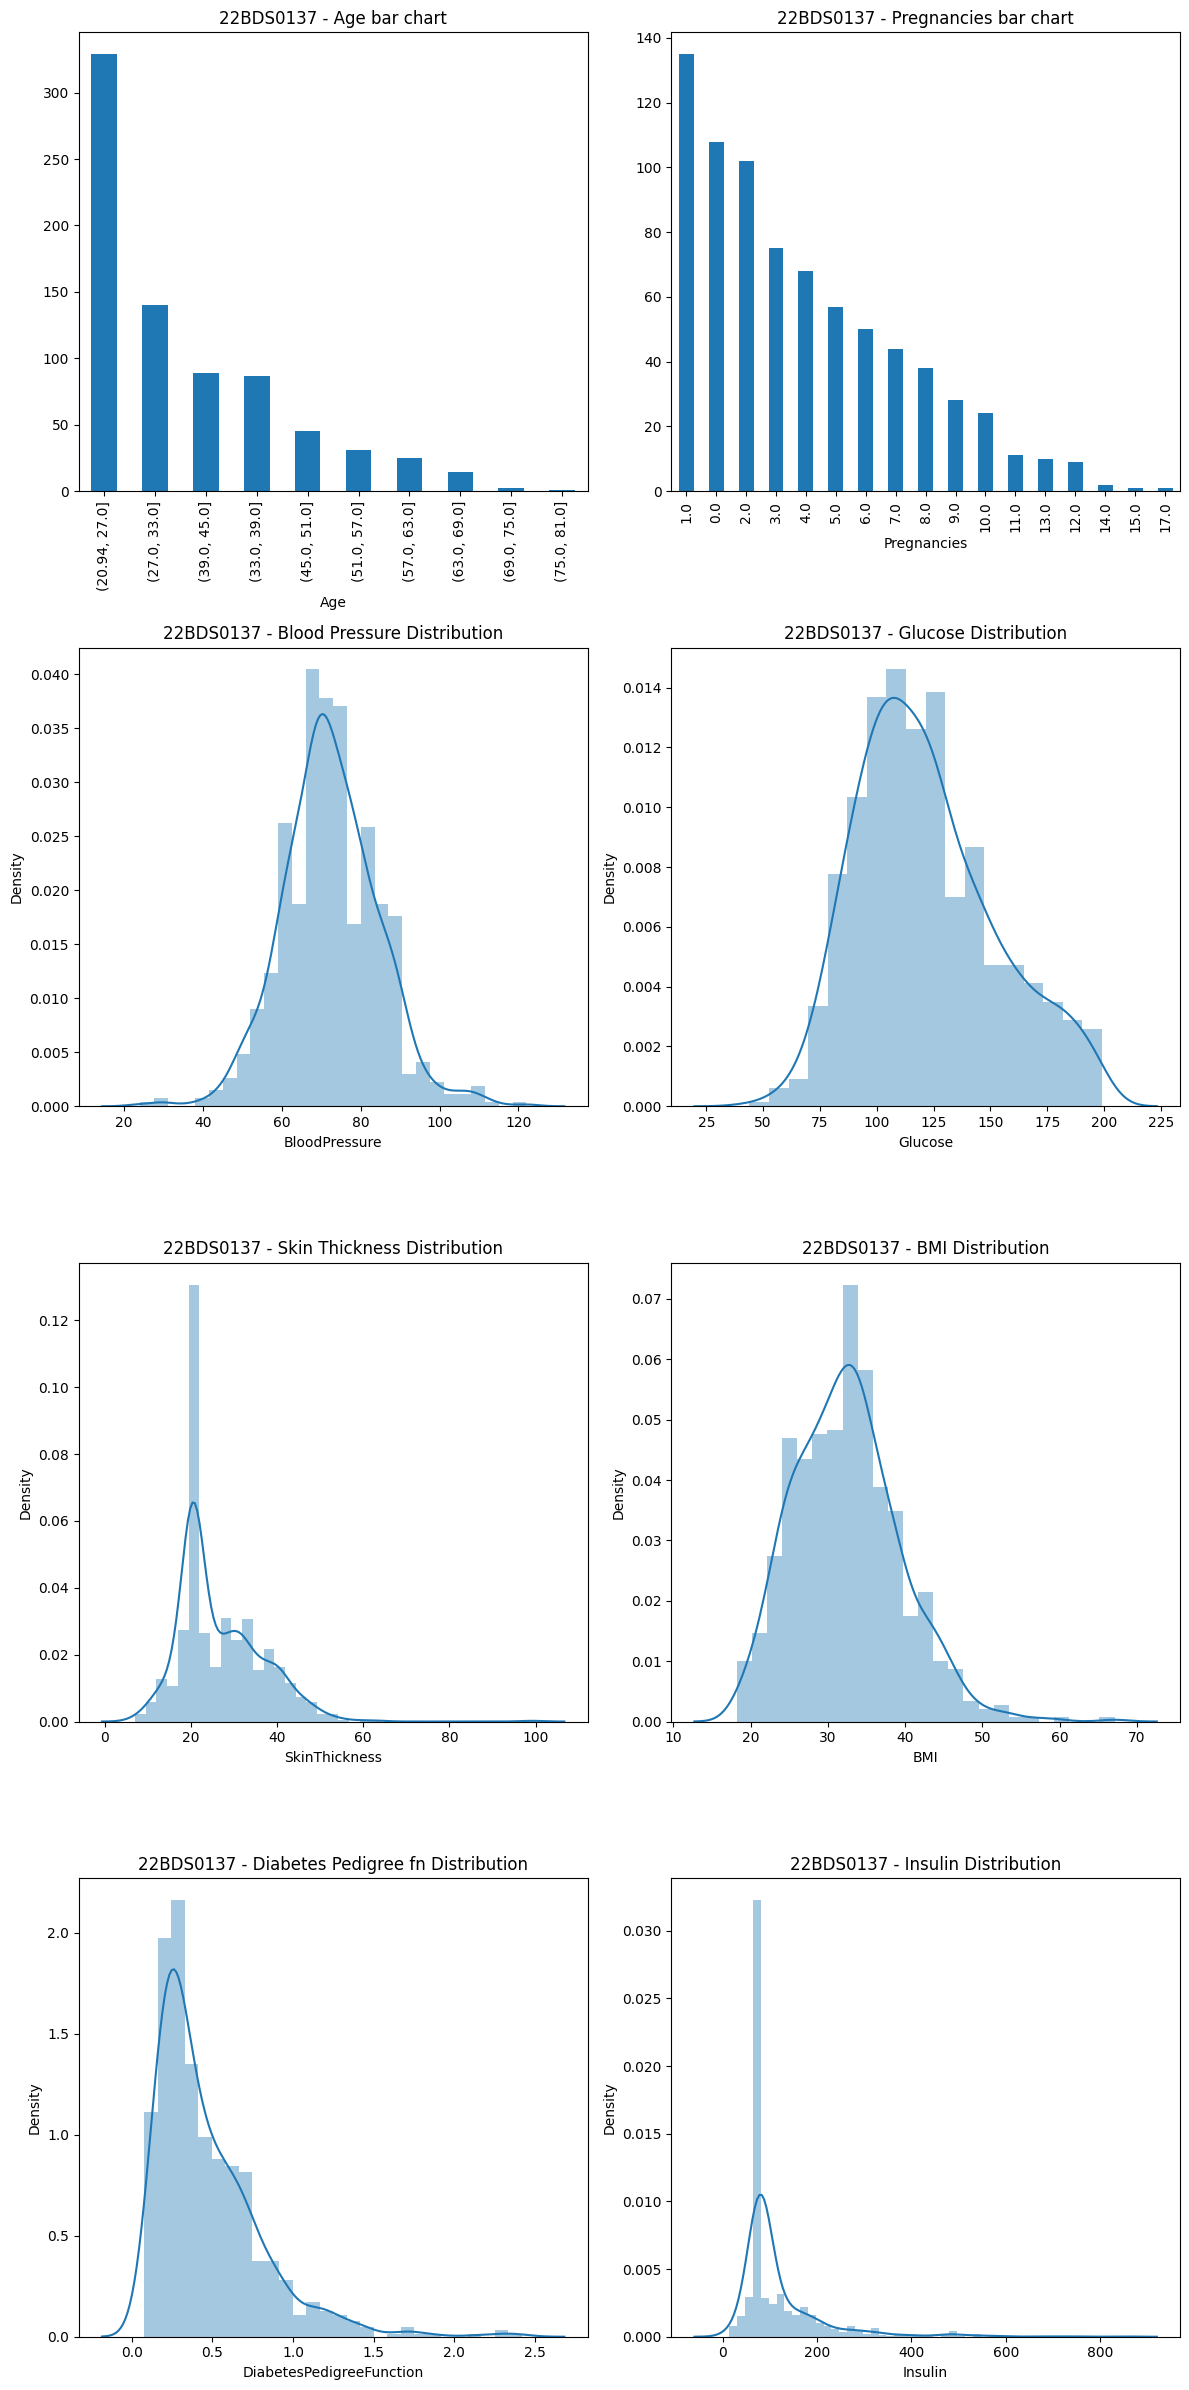

In [18]:
fig, axes = plt.subplots(4, 2, figsize=(12, 24))

p1 = pd.cut(df.Age,10).value_counts().plot(kind = "bar", title="22BDS0137 - Age bar chart",ax = axes[0,0])
p2 = df.Pregnancies.value_counts().plot(kind = "bar", title="22BDS0137 - Pregnancies bar chart",ax = axes[0,1])
p3 = sns.distplot(df.BloodPressure, kde=True, ax = axes[1,0])
axes[1, 0].set_title("22BDS0137 - Blood Pressure Distribution")
p4 = sns.distplot(df.Glucose, kde=True, ax = axes[1,1])
axes[1, 1].set_title("22BDS0137 - Glucose Distribution")
p5 = sns.distplot(df.SkinThickness, kde=True, ax = axes[2,0])
axes[2, 0].set_title("22BDS0137 - Skin Thickness Distribution")
p6 = sns.distplot(df.BMI, kde=True, ax = axes[2,1])
axes[2, 1].set_title("22BDS0137 - BMI Distribution")
p7 = sns.distplot(df.DiabetesPedigreeFunction, kde=True, ax = axes[3,0])
axes[3, 0].set_title("22BDS0137 - Diabetes Pedigree fn Distribution")
p8 = sns.distplot(df.Insulin, kde=True, ax = axes[3,1])
axes[3, 1].set_title("22BDS0137 - Insulin Distribution")

plt.tight_layout()
plt.show()


## Bivariate Analysis

<Axes: >

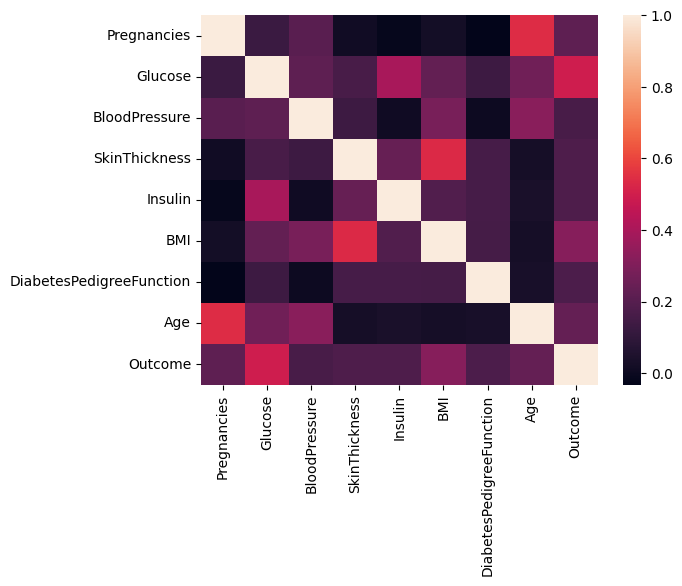

In [21]:
correlation = df.corr(method='pearson')
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)

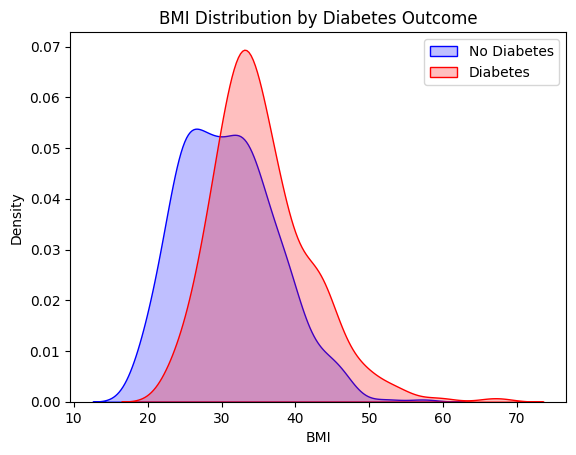

In [42]:
sns.kdeplot(df[df["Outcome"] == 0]["BMI"], label="No Diabetes", fill=True, color="blue")
sns.kdeplot(df[df["Outcome"] == 1]["BMI"], label="Diabetes", fill=True, color="red")

plt.title("BMI vs Diabetes Distributions")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.legend()
plt.show()